# NOTES

Info obtained via https://www.jpbox-office.com/

> **Other fields can be obtained via this site:**
> - poster thumbnail,
> - original title,

> **There are sometimes several genres**
>
> **But with my method I only extracted one**.

> **There are many directors missing**
>
> although my intension was to use the release year and the director to merge
>
> maybe this can be done via a composite key using the `jp_release` and `duration`
>
> or `jp_title`, but this will maybe require to normalize titles in each csv.


# Imports and Settings

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from eda_utils import *

# Data Loading

In [2]:
df = pd.read_csv("data/jp_box.csv")

# Overview

In [3]:
df.head()

,jp_copies,jp_director,jp_distributors,jp_duration,jp_genres,jp_nationality,jp_release,jp_title
0,31,NaN,KMBO,110,Comédie,Italie,2018-12-26,Troppa Grazia
1,56,NaN,-,100,Comédie dramatique,Canada,2022-12-07,Falcon Lake
2,111,NaN,-,90,Animation,Russie,2022-12-21,Opération Grizzli
3,128,NaN,Pyramide,147,Drame,Italie,2022-12-21,Les Huit Montagnes
4,89,NaN,Jour2Fête,143,Drame,Danemark,2022-12-21,Godland


In [4]:
df.shape

(8861, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8861 entries, 0 to 8860
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   jp_copies        8861 non-null   object
 1   jp_director      2317 non-null   object
 2   jp_distributors  8861 non-null   object
 3   jp_duration      8861 non-null   int64 
 4   jp_genres        8858 non-null   object
 5   jp_nationality   8858 non-null   object
 6   jp_release       8861 non-null   object
 7   jp_title         8861 non-null   object
dtypes: int64(1), object(7)
memory usage: 553.9+ KB


## Missing Values

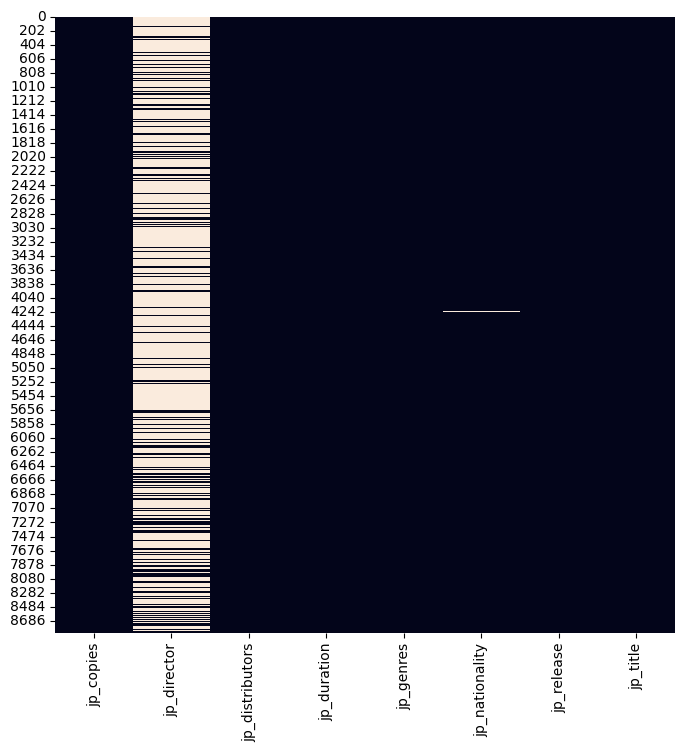

CPU times: user 477 ms, sys: 120 ms, total: 597 ms
Wall time: 397 ms


In [6]:
%%time
plt.figure(figsize=(8, 8))
sns.heatmap(df.isna(), cbar=None)
plt.show()

In [7]:
df.isna().sum()

jp_copies             0
jp_director        6544
jp_distributors       0
jp_duration           0
jp_genres             3
jp_nationality        3
jp_release            0
jp_title              0
dtype: int64

In [8]:
df.query("jp_genres.isna()")

,jp_copies,jp_director,jp_distributors,jp_duration,jp_genres,jp_nationality,jp_release,jp_title
7501,7,NaN,Equation,119,NaN,Corée du Sud,2008-01-23,Le Roi et le Clown
8364,87,NaN,Diaphana,89,NaN,NaN,2001-12-05,Les Ames calines
8803,0,NaN,Magouric Distrib.,80,NaN,France,2002-01-16,Le Doux amour des hommes


In [9]:
df.query("jp_nationality.isna()")

,jp_copies,jp_director,jp_distributors,jp_duration,jp_genres,jp_nationality,jp_release,jp_title
90,82,NaN,Condor Distribution,126,Drame,NaN,2022-12-28,Joyland
4237,82,NaN,KMBO,96,Drame,NaN,2022-04-20,Murina
8364,87,NaN,Diaphana,89,NaN,NaN,2001-12-05,Les Ames calines


# Features

## `jp_distributors`

In [10]:
df.jp_distributors.nunique()

170

In [11]:
df.jp_distributors.value_counts().head(50)

jp_distributors
Metropolitan                   550
Warner Bros.                   422
Pathé                          367
Mars Distribution              349
-                              314
Universal                      312
20th Century Fox               309
SND                            304
Bac Films                      280
Studiocanal                    266
Pyramide                       236
Diaphana                       235
Walt Disney Pictures           225
Le Pacte                       223
Sony Pictures                  221
UIP                            214
UGC Distribution               206
Wild Bunch                     202
Paramount                      197
ARP Selection                  177
Gaumont                        170
UFD                            160
EuropaCorp                     148
Ad vitam                       147
Haut et Court                  142
Rezo Films                     141
TFM Distribution               130
Films du Losange               127
GBVI

## `jp_nationality`

In [12]:
df.jp_nationality.nunique()

75

In [13]:
df.jp_nationality.value_counts().head(50)

jp_nationality
Etats-Unis         3532
France             3385
Grande-Bretagne     393
Japon               168
Italie              154
Espagne             145
Allemagne           145
Canada               81
Chine                70
Belgique             68
Corée du Sud         67
Inde                 54
Danemark             45
Australie            40
Israël               37
Argentine            34
Iran                 31
Russie               30
Suède                28
Brésil               24
Norvège              22
Irlande              20
Mexique              20
Autriche             16
Suisse               16
Turquie              15
Chili                15
Portugal             14
Rép. Tchèque         14
Pologne              12
Roumanie             11
Colombie             10
Finlande             10
Palestine            10
Islande               9
Grèce                 6
Thaïlande             6
Egypte                6
Hongrie               6
Lettonie              5
Afrique du Sud        4
L

## `jp_genres`

In [14]:
df.jp_genres.nunique()

20

In [15]:
df.jp_genres.value_counts()

jp_genres
Drame                 2147
Comédie               1860
Thriller               898
Comédie dramatique     787
Animation              725
Aventure - Action      572
Documentaire           365
Horreur                317
Romance                298
Science Fiction        205
Film familial          191
Fantasy                174
Comicbook              103
Musical                 83
Guerre                  57
Western                 35
Péplum                  21
Catastrophe             12
Court-métrage            4
X - Erotique             4
Name: count, dtype: int64

## `jp_duration`

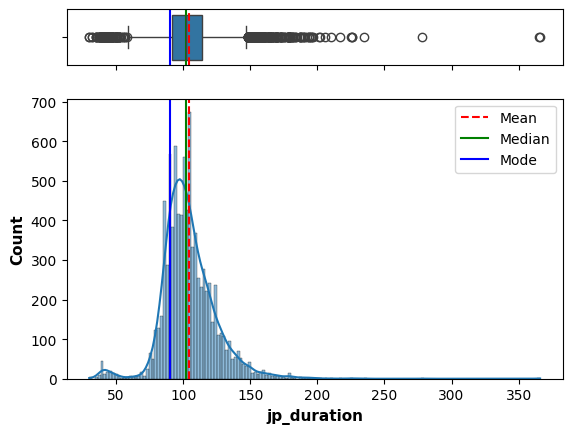

In [16]:
hist_box_plot("jp_duration", df)

## `jp_copies`

In [17]:
sorted(df.jp_copies.unique(), reverse=True)

['994',
 '993',
 '99',
 '983',
 '98',
 '971',
 '970',
 '97',
 '969',
 '960',
 '96',
 '958',
 '956',
 '955',
 '950',
 '95',
 '949',
 '945',
 '94',
 '938',
 '931',
 '93',
 '925',
 '923',
 '921',
 '92',
 '914',
 '910',
 '91',
 '909',
 '907',
 '906',
 '905',
 '903',
 '902',
 '901',
 '900',
 '90',
 '9',
 '893',
 '892',
 '890',
 '89',
 '885',
 '882',
 '880',
 '88',
 '877',
 '872',
 '871',
 '87',
 '867',
 '862',
 '86',
 '859',
 '858',
 '857',
 '855',
 '852',
 '851',
 '850',
 '85',
 '849',
 '848',
 '846',
 '844',
 '843',
 '842',
 '841',
 '84',
 '837',
 '836',
 '835',
 '834',
 '833',
 '831',
 '830',
 '83',
 '829',
 '828',
 '827',
 '824',
 '823',
 '822',
 '820',
 '82',
 '818',
 '815',
 '813',
 '812',
 '81',
 '809',
 '808',
 '807',
 '806',
 '805',
 '803',
 '802',
 '801',
 '800',
 '80',
 '8',
 '799',
 '798',
 '796',
 '795',
 '794',
 '793',
 '790',
 '79',
 '789',
 '787',
 '786',
 '785',
 '783',
 '782',
 '781',
 '780',
 '78',
 '778',
 '775',
 '772',
 '771',
 '770',
 '77',
 '768',
 '767',
 '765',
 '7

In [19]:
# Sorry cleaning wasn't already done in Scrapy pipeline
# Type optimized for memory usage
df.jp_copies = (df.jp_copies
                .str.replace(" ", "")
                .astype(np.uint16)
               )

In [20]:
df.jp_copies.describe()

count    8861.000000
mean      221.333371
std       197.858720
min         0.000000
25%        65.000000
50%       166.000000
75%       325.000000
max      1093.000000
Name: jp_copies, dtype: float64

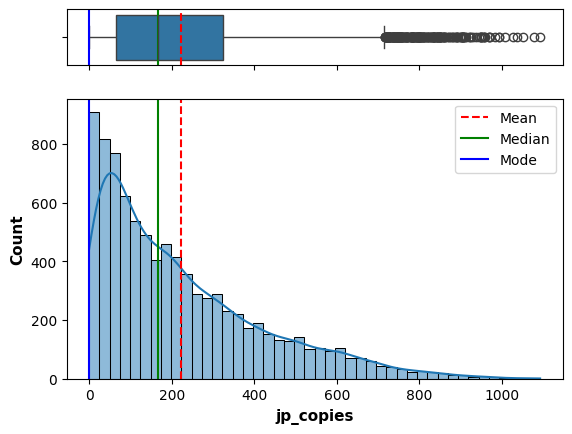

In [22]:
hist_box_plot("jp_copies", df)

## `jp_director`

In [23]:
df.jp_director.nunique()

356

In [25]:
df.jp_director.value_counts().head(50)

jp_director
Woody Allen             24
Steven Soderbergh       23
Ridley Scott            21
Steven Spielberg        21
François Ozon           21
Clint Eastwood          20
Patrice Leconte         16
Anne Fontaine           16
Robert Guédiguian       15
Ken Loach               15
Michael Winterbottom    14
Gus Van Sant            13
Michel Gondry           13
Benoît Jacquot          13
Guillaume Nicloux       13
Robert Rodriguez        13
Claude Lelouch          13
Stephen Frears          13
M. Night Shyamalan      13
Joel Coen               13
Ron Howard              13
Martin Scorsese         12
Olivier Assayas         12
Michael Bay             12
Win Wenders             12
Pierre Jolivet          12
Brett Ratner            12
Antoine Fuqua           12
Tim Burton              12
Guy Ritchie             12
Quentin Dupieux         12
André Téchiné           12
Olivier Baroux          12
Christopher Nolan       12
Lasse Hallstrom         12
Luc Besson              12
Peter Jackson   